In [2]:
import numpy as np
import matplotlib.pyplot as plt

CNOT_matrix=np.array([[1,0,0,0],
                      [0,1,0,0],
                      [0,0,0,1],
                      [0,0,1,0]])
hadamard=(1/(np.sqrt(2)))*np.array([[1, 1],[1,-1]])
ghz= (np.array([[1],[0],[0],[0],[0],[0],[0],[1]])/np.sqrt(2)).reshape(8,)

swap= np.array([[1,0,0,0],
                [0,0,1,0],
                [0,1,0,0],
                [0,0,0,1]])

identity = np.identity(4)
bell= (np.array([[1],[0],[0],[1]])/np.sqrt(2)).reshape(4,)


# Pure State

C:\Users\manoj\AppData\Local\Temp\ipykernel_36196\983081513.py:62: RuntimeWarning: invalid value encountered in divide
  density_matrix_pp = np.outer(first_copy_of_the_state,np.conjugate(first_copy_of_the_state)) / np.trace(np.outer((first_copy_of_the_state),np.conjugate(first_copy_of_the_state)))


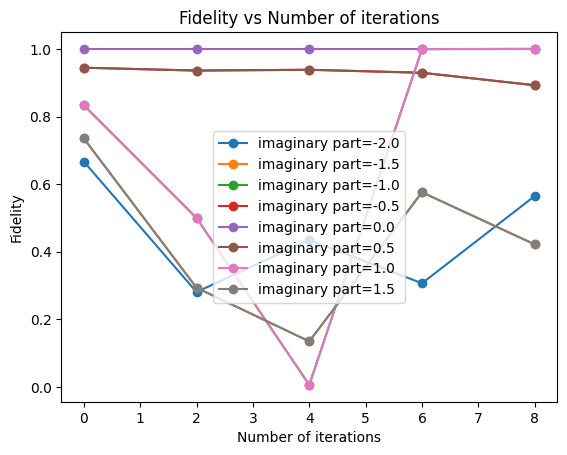

In [11]:
#initializing the state


psi_complex = np.empty(8,dtype=complex)


for w in np.arange(-2,2,0.5):
    real_part = 1
    imag_part = w
    psi_complex[0] = 1
    psi_complex[range(1,8)] = 0
    psi_complex[7] = complex(real_part, imag_part) * 1
 
    fidelity = 0
    psi_1=(psi_complex.reshape(8,))/np.linalg.norm(psi_complex)
    psi_2=psi_1
    f=[np.matmul(ghz.reshape(1,8),np.matmul((np.outer(psi_1,(np.conjugate(psi_1)))),ghz))]
    first_copy_of_the_state = 0
    # print(f)
    for i in range(16):
        psi = np.kron(psi_1,psi_2)
        
        #performing swap operation 
        swap_tensored_1 =np.kron(np.identity(4),np.kron(swap,np.identity(4)))
        swaped_state_1= np.matmul(swap_tensored_1,psi)
        swap_tensored_2 =np.kron(np.identity(2),np.kron(np.kron(swap,swap),np.identity(2)))
        swaped_state= np.matmul(swap_tensored_2,swaped_state_1)


        #cnot operation on swapped qubits 
        cnot = np.kron(np.kron(CNOT_matrix,CNOT_matrix),CNOT_matrix)
        state_after_cnot = np.matmul(cnot,swaped_state)

        #swapping the states back 
        original_psi_1 = np.matmul(swap_tensored_2,state_after_cnot)
        original_psi = np.matmul(swap_tensored_1,original_psi_1)

        #hadamard operation 
        tensored_hadamard = np.kron(np.kron(hadamard,np.kron(hadamard,hadamard)),np.identity(8))



        #measurement
        projector= np.array([[1,0],[0,0]])
        projector_tensored = np.kron(np.identity(8),(np.kron(np.kron(projector,projector),projector)))

        measured = np.dot(projector_tensored,original_psi)


        #tracing out the measured copy
        final_state_after_hadamard_1= measured.reshape(2,2,2,2,2,2)
        final_state_after_hadamard = np.einsum('ijklmn->ijk', final_state_after_hadamard_1).reshape(8,)
        first_copy_of_the_state  = np.matmul(np.kron(hadamard,np.kron(hadamard,hadamard)),final_state_after_hadamard.reshape(8,1))

        #creating bell state
        bell_state = (np.array([[1],[0],[0],[1]]) * (1/ np.sqrt(2))).reshape(4,)

        # preparation of density matrix of bell state and psi state by taking the outer product between the states
        density_matrix_ghz = np.outer((ghz),np.conjugate(ghz)) 

        #dividing by the trace of density matrix to make it 1
        density_matrix_pp = np.outer(first_copy_of_the_state,np.conjugate(first_copy_of_the_state)) / np.trace(np.outer((first_copy_of_the_state),np.conjugate(first_copy_of_the_state)))


        #calculation of fidelity
        x = np.matmul(np.conjugate(ghz.reshape(1,8)),np.matmul(density_matrix_pp,ghz))
        fidelity = x
        
        psi_1 = first_copy_of_the_state
        psi_2 = first_copy_of_the_state
        
        if i%2 !=0:
          f=f+[fidelity]

    plt.plot(range(0,17,2),f,label=f'imaginary part={w}',marker='o'),plt.legend()   

    # plt.plot(range(8),f,marker='o'),
    plt.xlabel('Number of iterations'),
    plt.ylabel('Fidelity'),
    plt.title('Fidelity vs Number of iterations')
   

Text(807.2394636015327, 0.5, 'Im')

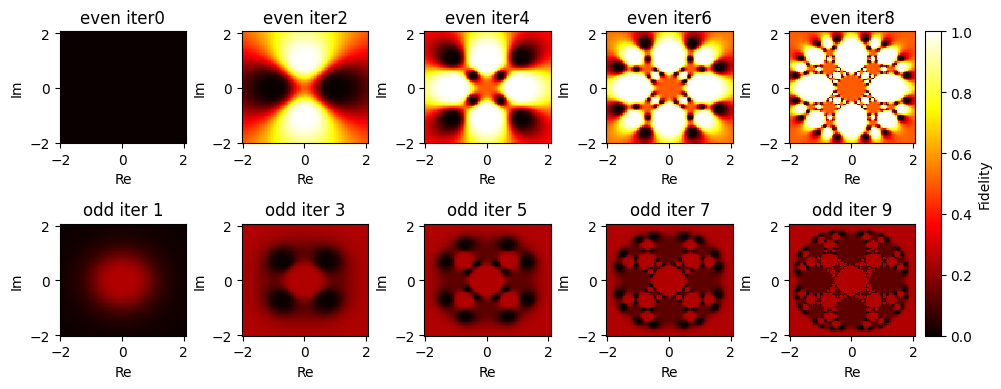

In [4]:
fig, axs = plt.subplots(2, 5,figsize=(11, 4))

#initializing the state
for c in np.arange(10):

    psi_complex = np.empty(8,dtype=complex)
    real = []
    imag = []
    f_even =[]
    f_odd =[]
    fidelity = 0
    fidelity_original_pure = []
    
    for y in np.arange(-2,2.1,0.05):

        real_part = y
        for i in np.arange(-2,2.1,0.05):
            imag_part = i
            psi_complex[0] = 1
            psi_complex[range(1,8)] = 0
            psi_complex[7] = complex(real_part, imag_part) * 1
        
            psi_1=(psi_complex.reshape(8,))/np.linalg.norm(psi_complex)
            psi_2=psi_1

            

            for i in np.arange(c):
                psi = np.kron(psi_1,psi_2)
        
                #performing swap operation 
                swap_tensored_1 =np.kron(np.identity(4),np.kron(swap,np.identity(4)))
                swaped_state_1= np.matmul(swap_tensored_1,psi)
                swap_tensored_2 =np.kron(np.identity(2),np.kron(np.kron(swap,swap),np.identity(2)))
                swaped_state= np.matmul(swap_tensored_2,swaped_state_1)


                #cnot operation on swapped qubits 
                cnot = np.kron(np.kron(CNOT_matrix,CNOT_matrix),CNOT_matrix)
                state_after_cnot = np.matmul(cnot,swaped_state)

                #swapping the states back 
                original_psi_1 = np.matmul(swap_tensored_2,state_after_cnot)
                original_psi = np.matmul(swap_tensored_1,original_psi_1)

                #hadamard operation 
                tensored_hadamard = np.kron(np.kron(hadamard,np.kron(hadamard,hadamard)),np.identity(8))



                #measurement
                projector= np.array([[1,0],[0,0]])
                projector_tensored = np.kron(np.identity(8),(np.kron(np.kron(projector,projector),projector)))

                measured = np.dot(projector_tensored,original_psi)


                #tracing out the measured copy
                final_state_after_hadamard_1= measured.reshape(2,2,2,2,2,2)
                final_state_after_hadamard = np.einsum('ijklmn->ijk', final_state_after_hadamard_1).reshape(8,)
                first_copy_of_the_state  = np.matmul(np.kron(hadamard,np.kron(hadamard,hadamard)),final_state_after_hadamard.reshape(8,1))

                #creating bell state
                bell_state = (np.array([[1],[0],[0],[1]]) * (1/ np.sqrt(2))).reshape(4,)

                # preparation of density matrix of bell state and psi state by taking the outer product between the states
                density_matrix_ghz = np.outer((ghz),np.conjugate(ghz)) 

                #dividing by the trace of density matrix to make it 1
                density_matrix_pp = np.outer(first_copy_of_the_state,np.conjugate(first_copy_of_the_state)) / np.trace(np.outer((first_copy_of_the_state),np.conjugate(first_copy_of_the_state)))


                #calculation of fidelity
                x = np.matmul(np.conjugate(ghz.reshape(1,8)),np.matmul(density_matrix_pp,ghz))
                fidelity = x
                

                psi_1 = first_copy_of_the_state.reshape(8,)
                psi_2 = first_copy_of_the_state.reshape(8,)
            
            
            if c%2==0:
                f_even=f_even+[fidelity]
            else:
                f_odd=f_odd+[fidelity]
            
        
            
    y = np.arange(-2, 2.1, 0.05)
    x = np.arange(-2, 2.1, 0.05)
    X, Y = np.meshgrid(x, y)

    if c%2==0:
        F_even = np.array(f_even).reshape(len(y), len(x))

        mesh = axs[0,c//2].pcolormesh(X, Y, np.abs(F_even), cmap='hot', shading='auto', vmin=0, vmax=1)
        axs[0,c//2].set_title(f'even iter{c}')
        axs[0,c//2].set_xlabel('Re')  # Set x-axis label for subplot in the first column
        axs[0,c//2].set_ylabel('Im')  # Set y-axis label for subplot in the first column

        plt.title(f'even iter{c}')
       
    

    
    else:
        F_odd = np.array(f_odd).reshape(len(y), len(x))

        mesh = axs[1,c//2].pcolormesh(X, Y, np.abs(F_odd), cmap='hot', shading='auto', vmin=0, vmax=1)
        axs[1,c//2].set_title(f'odd iter {c}')
        axs[1,c//2].set_xlabel('Re')  # Set x-axis label for subplot in the second column
        axs[1,c//2].set_ylabel('Im')  # Set y-axis label for subplot in the second column
        
        plt.title(f'odd iter {c}')
        
plt.tight_layout()         
cbar = fig.colorbar(mesh, ax=axs.ravel().tolist(), orientation='vertical',pad=0.01)
cbar.set_label('Fidelity')


plt.xlabel('Re')  # Set x-axis label
plt.ylabel('Im')  # Set y-axis label







# Mixed State

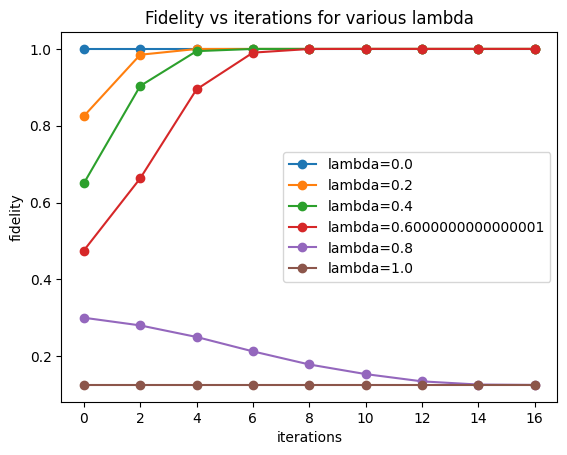

In [9]:

for w in np.arange(0,1.2,0.2):
    lambd = w
    den_1 = ((1-lambd)*density_matrix_ghz) + ((lambd*np.identity(8))/8)
    den_2 = den_1
    f=[np.matmul(np.conjugate(ghz.reshape(1,8)),np.matmul(den_1,ghz))]
   
    for i in range(16):

        den = np.kron(den_1,den_2)

        #performing swap operation 
        swap_tensored_1 =np.kron(np.identity(4),np.kron(swap,np.identity(4)))
        swaped_state_1= np.matmul(swap_tensored_1,np.matmul(den,swap_tensored_1.conj().T))
        swap_tensored_2 =np.kron(np.identity(2),np.kron(np.kron(swap,swap),np.identity(2)))
        swaped_state= np.matmul(swap_tensored_2,np.matmul(swaped_state_1,swap_tensored_2.conj().T))


        #cnot operation on swapped qubits 
        cnot = np.kron(np.kron(CNOT_matrix,CNOT_matrix),CNOT_matrix)
        state_after_cnot = np.matmul(cnot,(np.matmul(swaped_state,cnot.conj().T)))

        #swapping the states back 
        original_psi_1 = np.matmul(np.matmul(swap_tensored_2,state_after_cnot),swap_tensored_2.conj().T)
        original_psi = np.matmul(np.matmul(swap_tensored_1,original_psi_1),swap_tensored_1.conj().T)

        #hadamard operation 
        tensored_hadamard = np.kron(hadamard,np.kron(hadamard,hadamard))

        #measurement
        projector= np.array([[1,0],[0,0]])
        projector_tensored = np.kron(np.identity(8),(np.kron(np.kron(projector,projector),projector)))

        measured = np.dot(np.matmul(projector_tensored,original_psi),projector_tensored.conj().T)
        denominator = np.trace(np.matmul(original_psi,projector_tensored.conj().T))
        measured = measured/denominator

        #tracing out the measured copy
        final_state_after_hadamard_1= measured.reshape(2,2,2,2,2,2,2,2,2,2,2,2)
        final_state_after_hadamard = np.einsum('ijklmnopqrst->ijkopq', final_state_after_hadamard_1).reshape(8,8)
        first_copy_of_the_state  = np.matmul(tensored_hadamard,np.matmul(final_state_after_hadamard,tensored_hadamard.conj().T))


        # preparation of density matrix of bell state and psi state by taking the outer product between the states
        density_matrix_ghz = np.outer((ghz),np.conjugate(ghz)) 


        #calculation of fidelity
        x = np.matmul(np.conjugate(ghz.reshape(1,8)),np.matmul(first_copy_of_the_state,ghz))
        fidelity = x

        den_1 = first_copy_of_the_state
        den_2 = first_copy_of_the_state

        if i%2 !=0:
          f=f+[fidelity]
        
    plt.plot(range(0,17,2),f,label=f'lambda={w}',marker='o',),plt.legend()   
    plt.xlabel('iterations')
    plt.ylabel('fidelity')
    plt.title('Fidelity vs iterations for various lambda')

Text(577.3256704980844, 0.5, 'Im')

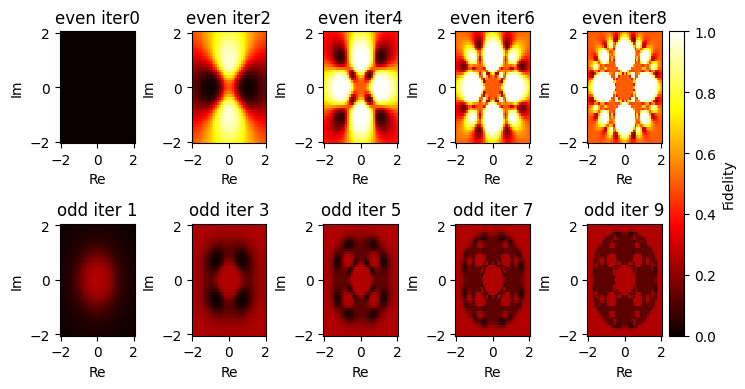

In [12]:
fig, axs = plt.subplots(2, 5,figsize=(8, 4))
lambd =0.3
#initializing the state
for c in np.arange(10):

    psi_complex = np.empty(8,dtype=complex)
    real = []
    imag = []
    f_even =[]
    f_odd =[]
    fidelity_original=[]
    fidelity = 0
    
    for y in np.arange(-2,2.1,0.1):

        real_part = y
        for i in np.arange(-2,2.1,0.1):
            imag_part = i
            psi_complex[0] = 1
            psi_complex[1:8] = 0
            psi_complex[7] = complex(real_part, imag_part) * 1
            psi_1=(psi_complex.reshape(8,))/np.linalg.norm(psi_complex)
            density_matrix_ghz = np.outer((psi_1),np.conjugate([psi_1]))
            den_1 = ((1-lambd)*density_matrix_ghz) + ((lambd*np.identity(8))/8)
            den_2 = den_1
            

             
        
            
            for i in range(c):

                den = np.kron(den_1,den_2)
                den = np.kron(den_1,den_2)

                #performing swap operation 
                swap_tensored_1 =np.kron(np.identity(4),np.kron(swap,np.identity(4)))
                swaped_state_1= np.matmul(swap_tensored_1,np.matmul(den,swap_tensored_1.conj().T))
                swap_tensored_2 =np.kron(np.identity(2),np.kron(np.kron(swap,swap),np.identity(2)))
                swaped_state= np.matmul(swap_tensored_2,np.matmul(swaped_state_1,swap_tensored_2.conj().T))


                #cnot operation on swapped qubits 
                cnot = np.kron(np.kron(CNOT_matrix,CNOT_matrix),CNOT_matrix)
                state_after_cnot = np.matmul(cnot,(np.matmul(swaped_state,cnot.conj().T)))

                #swapping the states back 
                original_psi_1 = np.matmul(np.matmul(swap_tensored_2,state_after_cnot),swap_tensored_2.conj().T)
                original_psi = np.matmul(np.matmul(swap_tensored_1,original_psi_1),swap_tensored_1.conj().T)

                #hadamard operation 
                tensored_hadamard = np.kron(hadamard,np.kron(hadamard,hadamard))

                #measurement
                projector= np.array([[1,0],[0,0]])
                projector_tensored = np.kron(np.identity(8),(np.kron(np.kron(projector,projector),projector)))

                measured = np.dot(np.matmul(projector_tensored,original_psi),projector_tensored.conj().T)
                denominator = np.trace(np.matmul(original_psi,projector_tensored.conj().T))
                measured = measured/denominator

                #tracing out the measured copy
                final_state_after_hadamard_1= measured.reshape(2,2,2,2,2,2,2,2,2,2,2,2)
                final_state_after_hadamard = np.einsum('ijklmnopqrst->ijkopq', final_state_after_hadamard_1).reshape(8,8)
                first_copy_of_the_state  = np.matmul(tensored_hadamard,np.matmul(final_state_after_hadamard,tensored_hadamard.conj().T))   
                
                # preparation of density matrix of bell state and psi state by taking the outer product between the states
                density_matrix_ghz = np.outer((ghz),np.conjugate(ghz)) 


                #calculation of fidelity
                x = np.matmul(np.conjugate(ghz.reshape(1,8)),np.matmul(first_copy_of_the_state,ghz))
                fidelity = x
                
                den_1 = first_copy_of_the_state
                den_2 = den_1
                
            if c%2==0:
             f_even=f_even+[fidelity]
            else:
             f_odd=f_odd+[fidelity]

            

    y = np.arange(-2, 2.1, 0.1)
    x = np.arange(-2, 2.1, 0.1)
    X, Y = np.meshgrid(x, y)
    # F_ori = np.array(fidelity_original).reshape(len(y), len(x))
    # mesh_ori = plt.pcolormesh(X, Y, np.abs(F_ori), cmap='hot', shading='auto', vmin=0, vmax=1)

    if c%2==0:
        F_even = np.array(f_even).reshape(len(y), len(x))

        mesh = axs[0,c//2].pcolormesh(X, Y, np.abs(F_even), cmap='hot', shading='auto', vmin=0, vmax=1)
        axs[0,c//2].set_title(f'even iter{c}')
        axs[0,c//2].set_xlabel('Re')  # Set x-axis label for subplot in the first column
        axs[0,c//2].set_ylabel('Im')  # Set y-axis label for subplot in the first column

        plt.title(f'even iter{c}')

    else:
        F_odd = np.array(f_odd).reshape(len(y), len(x))

        # Plot for odd iterations in the second column
        
        mesh = axs[1,c//2].pcolormesh(X, Y, np.abs(F_odd), cmap='hot', shading='auto', vmin=0, vmax=1)
        axs[1,c//2].set_title(f'odd iter {c}')
        axs[1,c//2].set_xlabel('Re')  # Set x-axis label for subplot in the second column
        axs[1,c//2].set_ylabel('Im')  # Set y-axis label for subplot in the second column
        
        plt.title(f'odd iter {c}')
        

plt.tight_layout()         
cbar = fig.colorbar(mesh, ax=axs.ravel().tolist(), orientation='vertical',pad=0.01)
cbar.set_label('Fidelity')


plt.xlabel('Re')  # Set x-axis label
plt.ylabel('Im')  # Set y-axis label


              